# Initial Setup and Data Loading

In [4]:
%pip install --upgrade pip
%pip install xgboost scikit-learn kagglehub jupyter ipykernel ipywidgets lightgbm seaborn plotly
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data Loading and Initial Exploration

In [5]:
import kagglehub
data_path = kagglehub.dataset_download('mahdiehhajian/bank-marketing')+ '/bank/bank-full.csv'
print(data_path)
dataset = pd.read_csv(data_path, sep=';')
data=dataset.copy()

/home/ghost/.cache/kagglehub/datasets/mahdiehhajian/bank-marketing/versions/1/bank/bank-full.csv


In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36396,47,blue-collar,married,primary,no,373,yes,no,cellular,11,may,480,2,-1,0,unknown,no
41421,46,management,married,tertiary,no,1950,no,no,cellular,4,sep,56,2,-1,0,unknown,no
28921,57,management,married,tertiary,no,8141,no,no,cellular,2,feb,37,1,-1,0,unknown,no
23148,40,management,single,tertiary,no,0,no,no,cellular,26,aug,58,7,-1,0,unknown,no
28999,32,management,married,tertiary,no,1852,no,no,cellular,2,feb,175,2,-1,0,unknown,no
38352,46,blue-collar,married,secondary,no,51,yes,no,cellular,15,may,333,1,-1,0,unknown,no
25652,32,management,single,tertiary,no,2280,yes,no,cellular,19,nov,206,2,-1,0,unknown,no
38414,31,blue-collar,single,secondary,no,210,yes,yes,cellular,15,may,166,1,-1,0,unknown,no
17021,31,blue-collar,single,secondary,yes,-535,yes,no,cellular,25,jul,163,1,-1,0,unknown,no
12566,47,blue-collar,married,primary,no,-187,no,no,unknown,3,jul,652,1,-1,0,unknown,no


In [8]:
data.shape

(45211, 17)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
data.duplicated().sum()

np.int64(0)

Based on the analysis performed so far, let's summarize the findings:

*   The dataset has been loaded and explored using `head()`, `sample()`, `shape`, `info()`, and `describe()` methods.
*   The dataset contains both numerical and categorical features.
*   The shape of the dataset is (45211, 17).
*   There are no duplicated rows in the dataset.

Now, let's add some insights and observations based on the code and outputs.

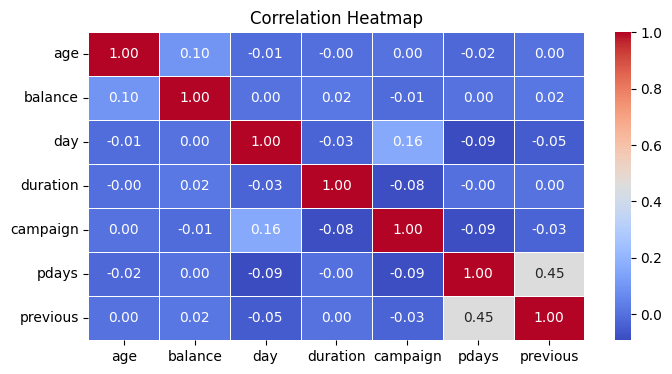

In [12]:
# Compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Highly Correlated Feature Pairs (Threshold >= 0.8):
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


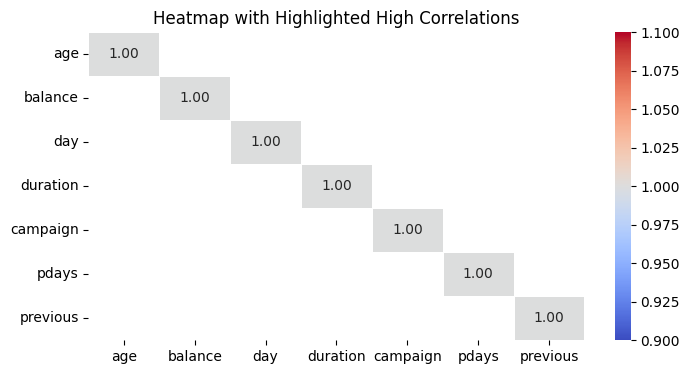

In [13]:
# Step: Check for Multicollinearity (Optimized)
# Use the correlation matrix computed earlier (assuming it's stored in 'correlation_matrix')
threshold = 0.8

# Consider only the upper triangle of the correlation matrix to avoid redundant pairs
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Stack and filter the pairs where absolute correlation exceeds the threshold
high_corr_pairs = (
    upper_tri.stack().reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"].abs() >= threshold]
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print("Highly Correlated Feature Pairs (Threshold >= 0.8):")
print(high_corr_pairs)

# Create a mask to highlight high correlations on the heatmap
mask = (correlation_matrix.abs() < threshold)
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            mask=mask)
plt.title("Heatmap with Highlighted High Correlations")
plt.show()

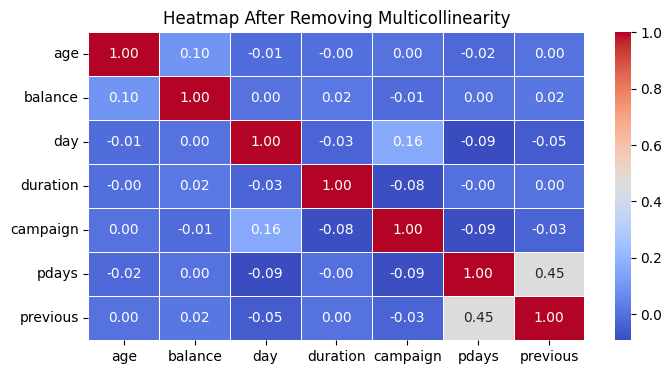

Dropped features to reduce multicollinearity: []


In [14]:
# Keep only numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = data_numeric.corr()

# Set threshold for high correlation
threshold = 0.8

# Create mask for upper triangle and extract high correlation pairs
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
high_corr_pairs = (
    pd.DataFrame(corr_matrix.where(mask))
    .stack()
    .reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"].abs() > threshold]

# Drop one feature for each high correlation pair
drop_features = high_corr_pairs["Feature 2"].unique()
data_cleaned = data_numeric.drop(columns=drop_features)

# Plot heatmap of the cleaned data
plt.figure(figsize=(8, 4))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap After Removing Multicollinearity")
plt.show()

print(f"Dropped features to reduce multicollinearity: {drop_features}")


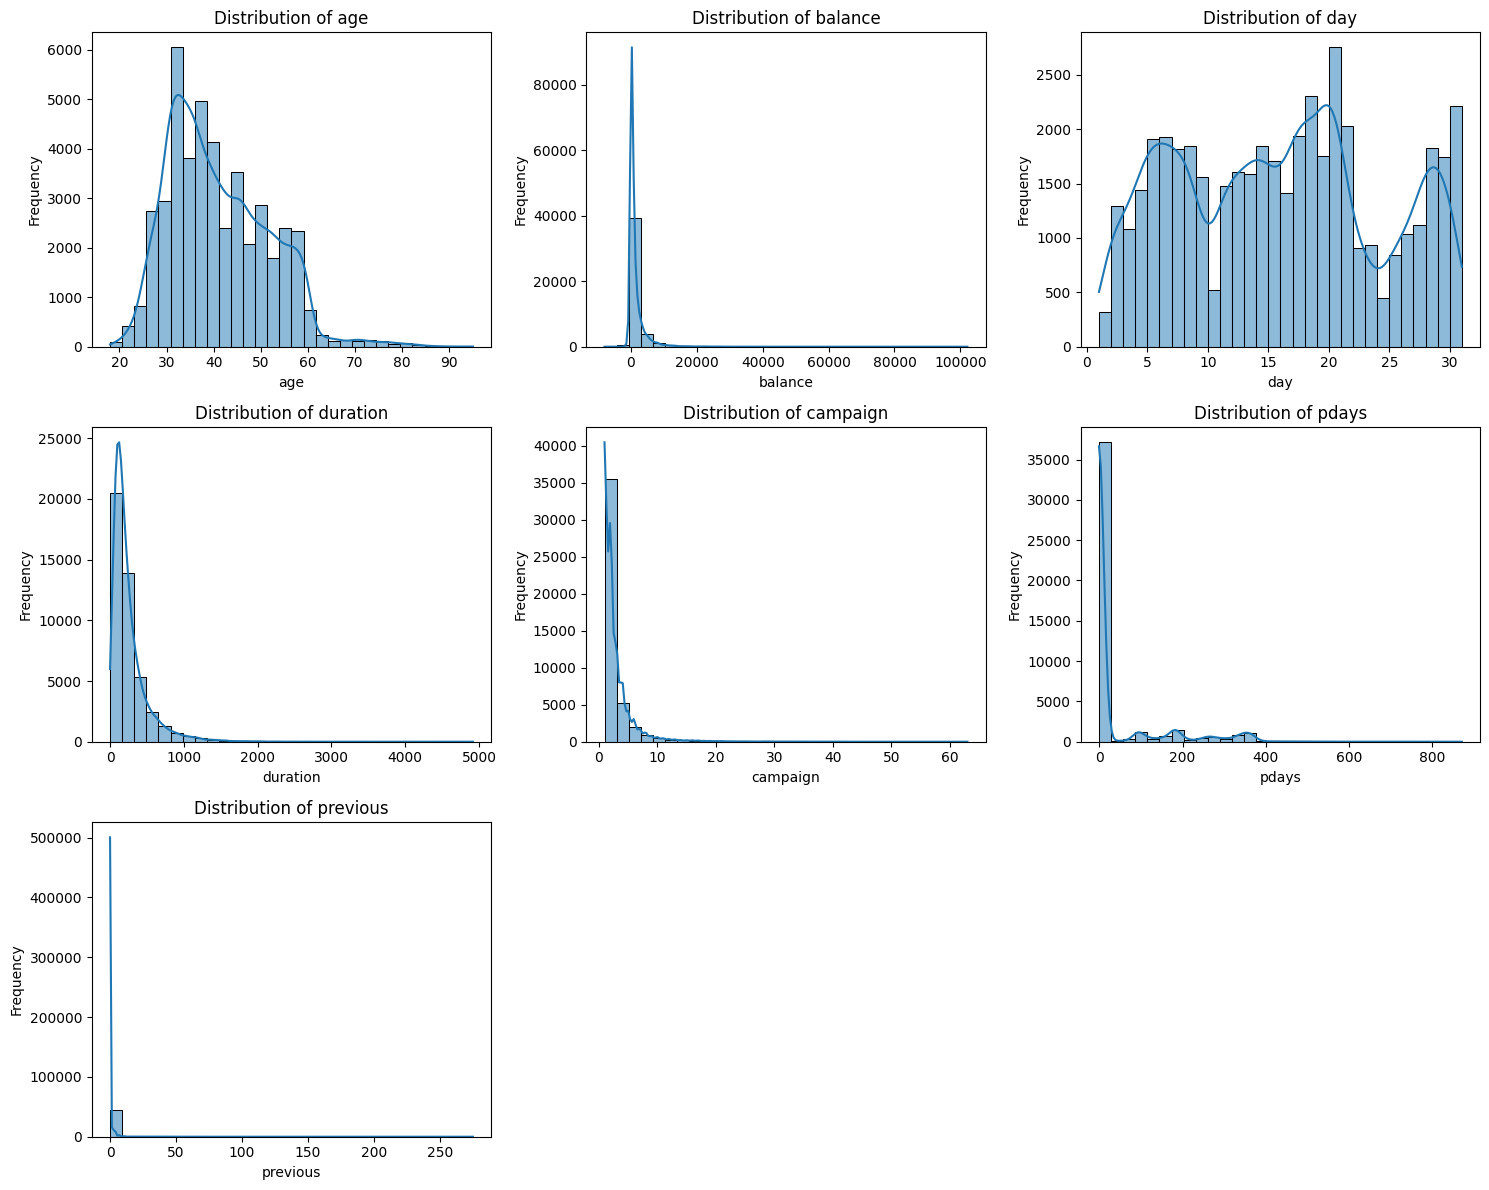

In [15]:
# Select numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Define number of columns for subplots
num_cols = 3  # Number of histograms per row
num_rows = -(-len(numeric_columns) // num_cols)  # Compute required rows (ceiling division)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot histograms
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide unused subplots (if any)
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


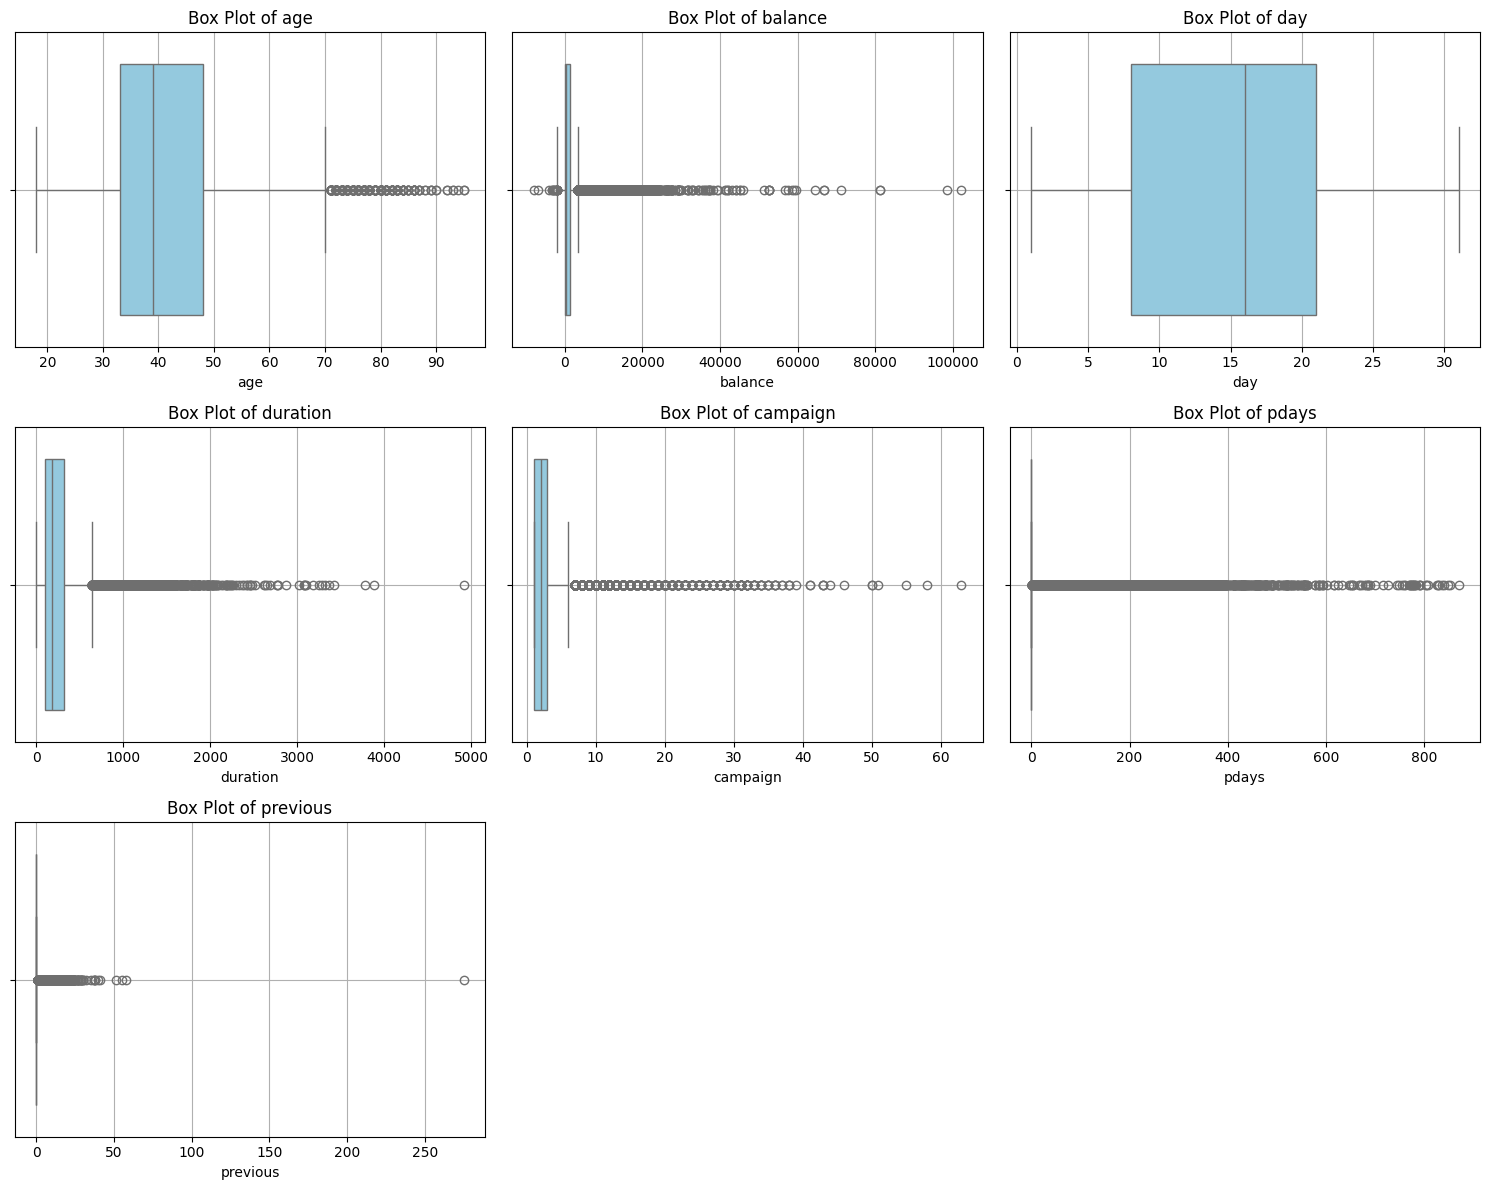

In [16]:
# Select numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Define number of columns for subplots
num_cols = 3  # Number of box plots per row
num_rows = -(-len(numeric_columns) // num_cols)  # Compute required rows (ceiling division)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot box plots
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i], color='skyblue')  # Added color for better visualization
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True)  # Added grid for easier value reading

# Hide unused subplots (if any)
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

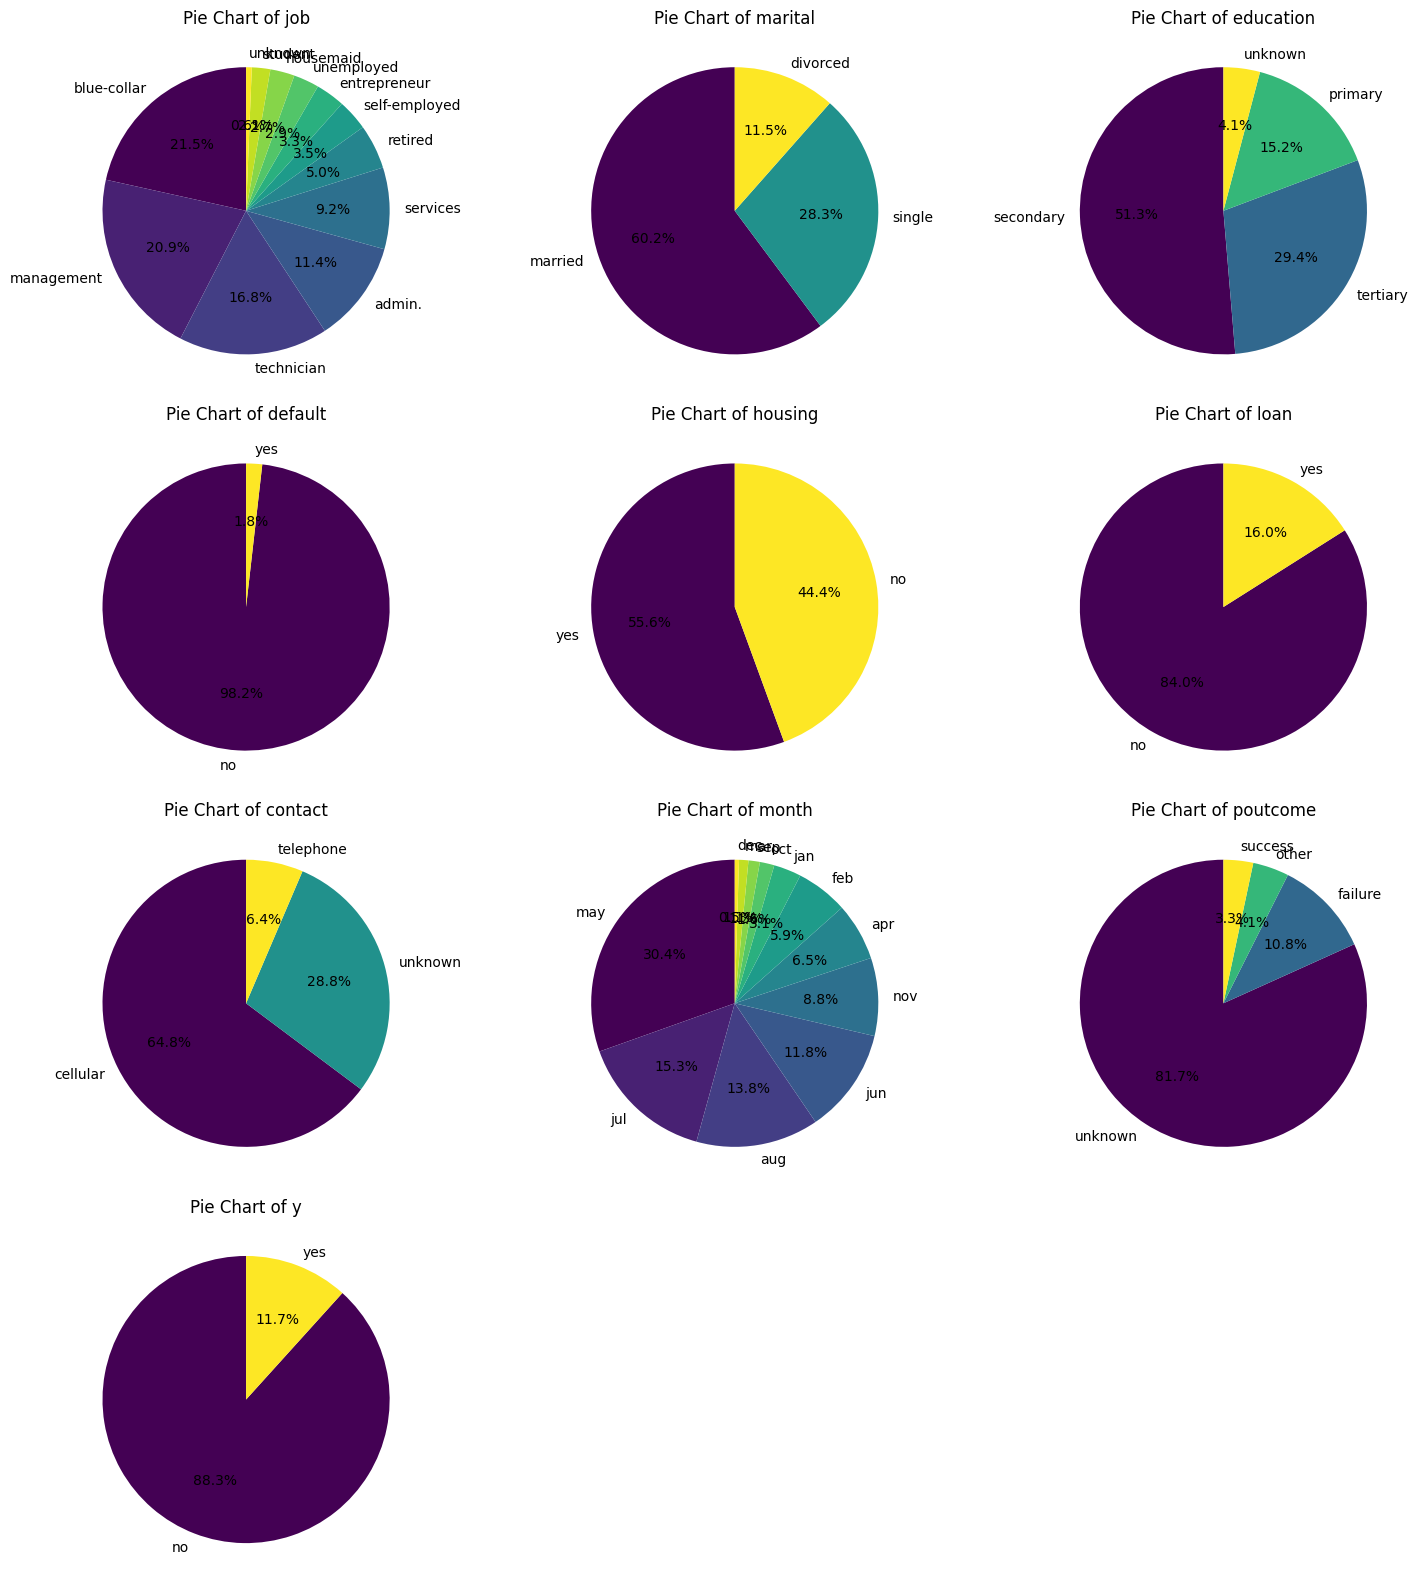

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Define number of columns for subplots
num_cols = 3  # Number of pie charts per row
num_rows = -(-len(categorical_columns) // num_cols)  # Compute required rows (ceiling division)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot pie charts
for i, col in enumerate(categorical_columns):
    data[col].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[i]
    )
    axes[i].set_title(f"Pie Chart of {col}")
    axes[i].set_ylabel("")  # Remove default y-label

# Hide unused subplots (if any)
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

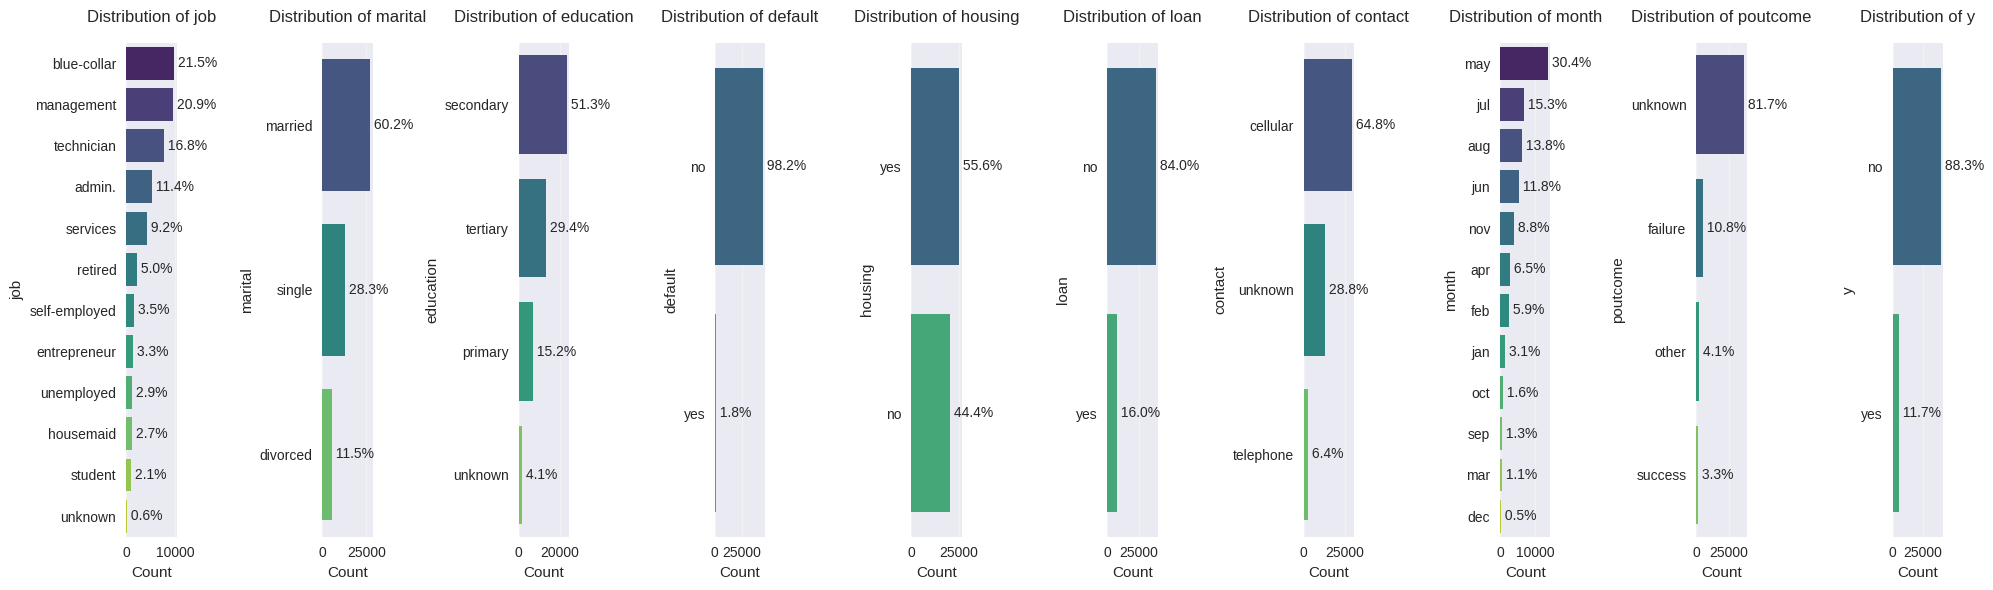

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Set figure size and style
plt.style.use('seaborn-v0_8')  # Using a valid style name
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(20, 6))

# Create enhanced bar plots for each categorical column
for ax, col in zip(axes, categorical_columns):
    # Calculate percentages
    value_counts = data[col].value_counts()
    total = len(data[col])
    percentages = (value_counts / total) * 100
    
    # Create bar plot
    sns.barplot(y=value_counts.index, x=value_counts.values, 
                palette="viridis", ax=ax, orient='h')
    
    # Add percentage labels
    for i, v in enumerate(value_counts.values):
        ax.text(v, i, f' {percentages[i]:.1f}%', va='center')
    
    # Customize appearance
    ax.set_title(f'Distribution of {col}', pad=15, fontsize=12)
    ax.set_xlabel('Count')
    ax.grid(True, axis='x', alpha=0.3)
    
    # Rotate x-axis labels if needed
    ax.tick_params(axis='y', labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
data.shape

(45211, 17)

In [20]:
# Define numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

# Outlier detection using IQR
Q1 = data[numeric_features].quantile(0.25)  # First quartile
Q3 = data[numeric_features].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag rows with outliers
outliers = ((data[numeric_features] < lower_bound) | (data[numeric_features] > upper_bound)).any(axis=1)

# Remove outliers
data_no_outliers = data[~outliers]

print(f"Number of outliers removed: {outliers.sum()}")
print(f"Data shape after removing outliers: {data_no_outliers.shape}")

Number of outliers removed: 17018
Data shape after removing outliers: (28193, 17)


In [21]:
from scipy.stats import skew

# Check skewness
skewed_features = data[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[abs(skewed_features) > 0.75]  # Threshold for high skewness

# Apply log transformation to reduce skewness
for feature in skewed_features.index:
    data[feature] = data[feature].apply(lambda x: np.log1p(x) if x > 0 else x)

In [22]:
print("Columns in the dataset:")
print(list(data.columns))

# Get list of categorical columns
categorical_columns = data.select_dtypes(include='object').columns.tolist()

if categorical_columns:
    print("\nCategorical columns:")
    print(categorical_columns)
    
    # One-hot encode categorical columns dropping the first category to avoid multicollinearity
    encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
    
    print("\nData after one-hot encoding:")
    display(encoded_data.head())
    print("\nHead rows of categorical columns:")
    display(data[categorical_columns].head())
    # Identify the one-hot encoded columns by finding those present in encoded_data but not in the original data
    encoded_cols = list(set(encoded_data.columns) - set(data.columns))

    print("\nHead of encoded columns:")
    display(encoded_data[encoded_cols].head())
else:
    print("No categorical columns found to encode.")

Columns in the dataset:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Categorical columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Data after one-hot encoding:


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,7.670429,5,5.568345,0.693147,-1.0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,3.401197,5,5.023881,0.693147,-1.0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,1.098612,5,4.343805,0.693147,-1.0,0.0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,7.317876,5,4.532599,0.693147,-1.0,0.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,0.693147,5,5.293305,0.693147,-1.0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False



Head rows of categorical columns:


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no



Head of encoded columns:


,contact_telephone,month_may,default_yes,month_oct,education_tertiary,month_sep,job_housemaid,month_aug,month_jan,job_retired,...,job_unknown,poutcome_other,job_blue-collar,contact_unknown,month_feb,job_unemployed,education_unknown,month_dec,job_student,job_entrepreneur
0,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False


In [23]:
# Ensure that numeric_features is defined and contains columns to scale
if numeric_features.size > 0:
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    # Apply scaling using .loc to preserve the rest of the dataframe
    data.loc[:, numeric_features] = scaler.fit_transform(data.loc[:, numeric_features])
    
    print("Data after Min-Max Scaling (first 5 rows):")
    display(data.head())
else:
    print("No numeric features available for scaling.")

Data after Min-Max Scaling (first 5 rows):


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.999519,yes,no,unknown,0.133333,may,0.655033,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.998987,yes,no,unknown,0.133333,may,0.590985,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.998701,yes,yes,unknown,0.133333,may,0.510984,0.0,0.0,0.0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.999475,yes,no,unknown,0.133333,may,0.533193,0.0,0.0,0.0,unknown,no
4,0.194805,unknown,single,unknown,no,0.998650,no,no,unknown,0.133333,may,0.622679,0.0,0.0,0.0,unknown,no


In [24]:
# Optimized splitting of features and target variable
target_col = 'y'
if target_col not in data.columns:
    raise KeyError(f"Column '{target_col}' does not exist in the dataframe.")

y = data[target_col]
X = data.drop(columns=target_col)

# Display target variable distribution (in percentages)
print("Target variable distribution (%):")
print(y.value_counts(normalize=True) * 100)

Target variable distribution (%):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [25]:
# Split data into training and test sets with stratification to preserve target distribution
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Print shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (31647, 16)
X_test shape: (13564, 16)
y_train shape: (31647,)
y_test shape: (13564,)


In [26]:
# Convert target labels to numeric values if they are not already
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder for binary columns
label_encoders = {}
# Identify binary columns (those with exactly two unique values)
binary_columns = [col for col in data.columns if data[col].nunique() == 2]

for col in binary_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# One-hot encoding for multi-category columns
# Automatically one-hot encode multi-category columns (non-binary categorical columns)
multi_cat_columns = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() > 2]
if multi_cat_columns:
    data = pd.get_dummies(data, columns=multi_cat_columns, drop_first=True)

# Define features (X) and target variable (y)
X = data.drop(columns=["y"])
y = data["y"]
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9016
Confusion Matrix:
[[7775  177]
 [ 713  378]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.68      0.35      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

ROC AUC Score: 0.9045


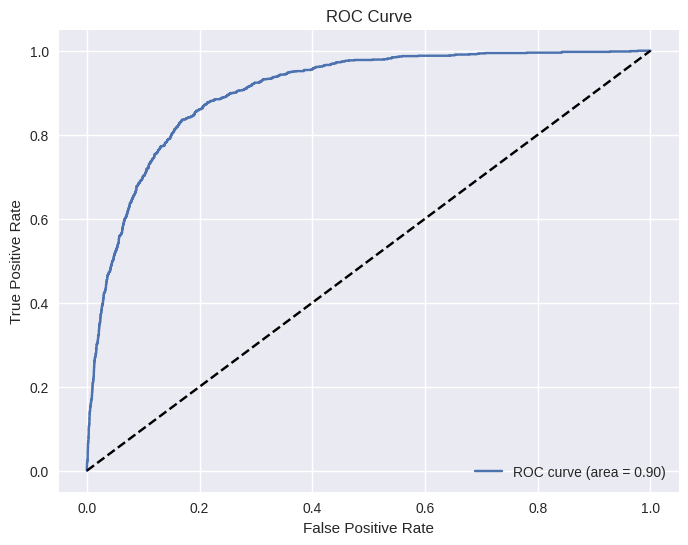

In [27]:
# Train a logistic regression model using the training set
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(clf_report)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

XGBClassifier Accuracy: 0.9055
XGBClassifier Confusion Matrix:
[[7654  298]
 [ 557  534]]
XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.64      0.49      0.56      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043

XGBClassifier ROC AUC Score: 0.9301


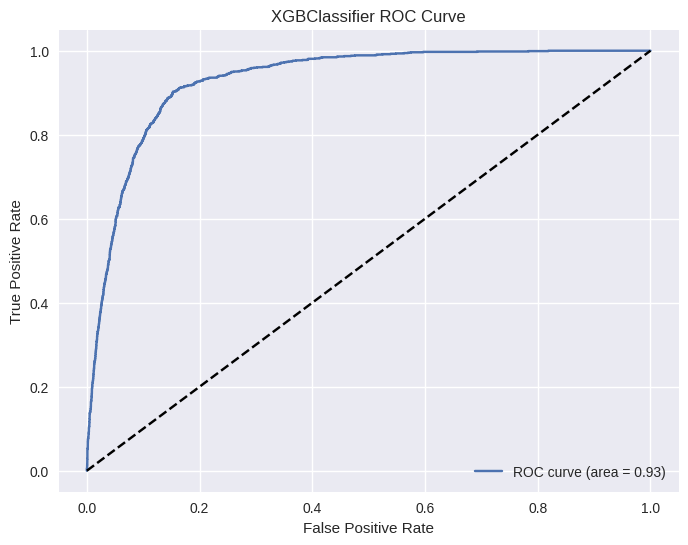

In [28]:
# Train an XGBClassifier model, evaluate it and plot the ROC curve

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predict on the test set using XGBClassifier
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
clf_report_xgb = classification_report(y_test, y_pred_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# Print metrics
print(f"XGBClassifier Accuracy: {acc_xgb:.4f}")
print("XGBClassifier Confusion Matrix:")
print(cm_xgb)
print("XGBClassifier Classification Report:")
print(clf_report_xgb)
print(f"XGBClassifier ROC AUC Score: {roc_auc_xgb:.4f}")

# Plot the ROC curve for XGBClassifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC curve (area = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBClassifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

RandomForestClassifier Accuracy: 0.9048
Confusion Matrix:
[[7749  203]
 [ 658  433]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.68      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

RandomForestClassifier ROC AUC Score: 0.9264


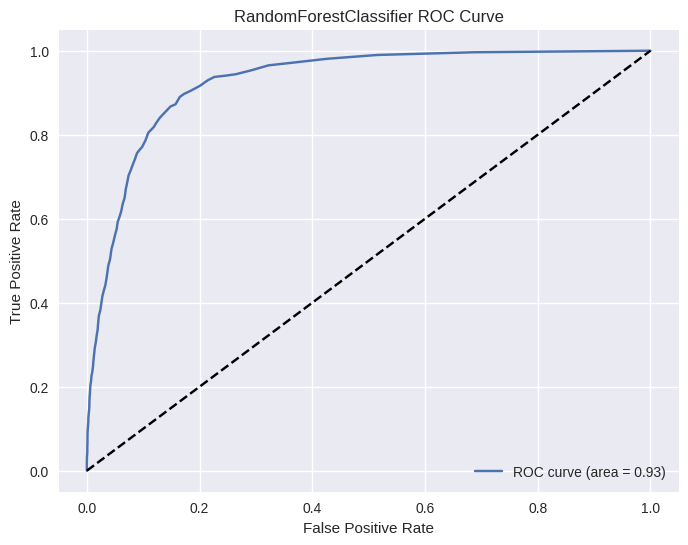

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Use the already split data from previous cells
X_enc_train, X_enc_val = X_train, X_test
y_enc_train, y_enc_val = y_train, y_test

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_enc_train, y_enc_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_enc_val)
y_pred_proba_rf = rf_model.predict_proba(X_enc_val)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_enc_val, y_pred_rf)
cm_rf = confusion_matrix(y_enc_val, y_pred_rf)
clf_report_rf = classification_report(y_enc_val, y_pred_rf)
roc_auc_rf = roc_auc_score(y_enc_val, y_pred_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_enc_val, y_pred_proba_rf)

# Print evaluation metrics
print(f"RandomForestClassifier Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:")
print(cm_rf)
print("Classification Report:")
print(clf_report_rf)
print(f"RandomForestClassifier ROC AUC Score: {roc_auc_rf:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RandomForestClassifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

SVM Classifier Accuracy: 0.8934
Confusion Matrix:
[[7852  100]
 [ 864  227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.69      0.21      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.60      0.63      9043
weighted avg       0.88      0.89      0.87      9043

SVM Classifier ROC AUC Score: 0.9130


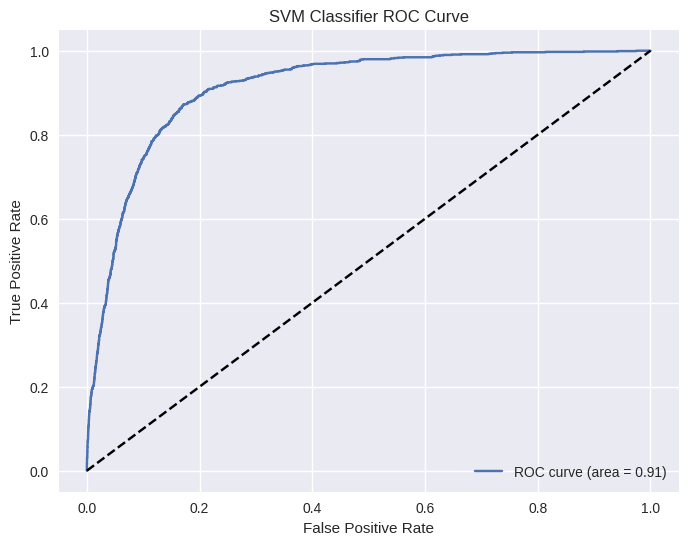

In [30]:
# Train and evaluate SVM classifier
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
clf_report_svm = classification_report(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

# Print evaluation metrics
print(f"SVM Classifier Accuracy: {accuracy_svm:.4f}")
print("Confusion Matrix:")
print(cm_svm)
print("Classification Report:")
print(clf_report_svm)
print(f"SVM Classifier ROC AUC Score: {roc_auc_svm:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

Decision Tree Classifier Accuracy: 0.8745
Confusion Matrix:
[[7364  588]
 [ 547  544]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.50      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.87      0.88      9043

Decision Tree Classifier ROC AUC Score: 0.7123


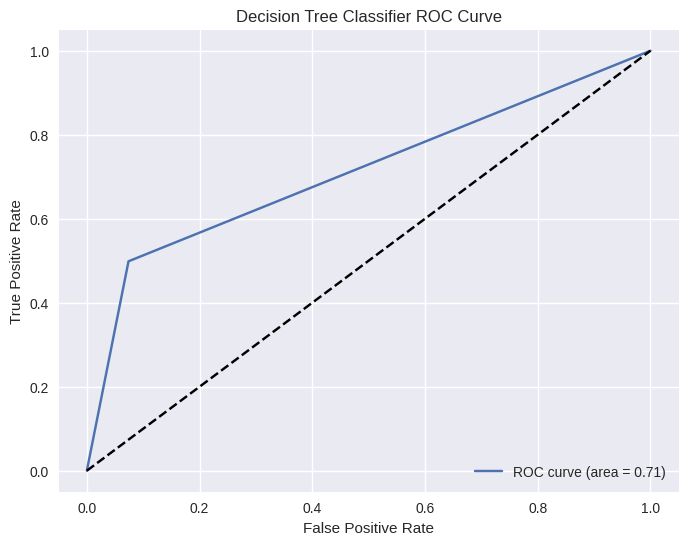

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
clf_report_dt = classification_report(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

# Print evaluation metrics
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("Confusion Matrix:")
print(cm_dt)
print("Classification Report:")
print(clf_report_dt)
print(f"Decision Tree Classifier ROC AUC Score: {roc_auc_dt:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

Gaussian Naive Bayes Accuracy: 0.8508
Confusion Matrix:
[[7222  730]
 [ 619  472]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7952
           1       0.39      0.43      0.41      1091

    accuracy                           0.85      9043
   macro avg       0.66      0.67      0.66      9043
weighted avg       0.86      0.85      0.85      9043

Gaussian Naive Bayes ROC AUC Score: 0.7838


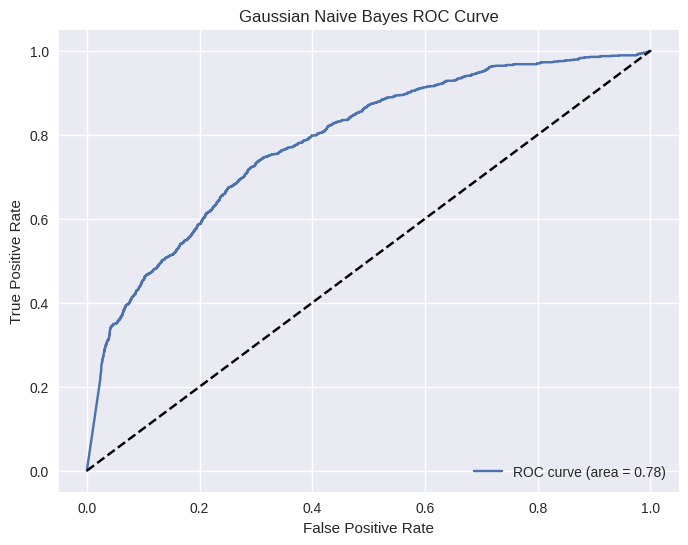

In [32]:
from sklearn.naive_bayes import GaussianNB

# Train GaussianNB classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
clf_report_nb = classification_report(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)

# Print evaluation metrics
print(f"Gaussian Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("Confusion Matrix:")
print(cm_nb)
print("Classification Report:")
print(clf_report_nb)
print(f"Gaussian Naive Bayes ROC AUC Score: {roc_auc_nb:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gaussian Naive Bayes ROC Curve")
plt.legend(loc="lower right")
plt.show()

Quadratic Discriminant Analysis Accuracy: 0.8640
Confusion Matrix:
[[7338  614]
 [ 616  475]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7952
           1       0.44      0.44      0.44      1091

    accuracy                           0.86      9043
   macro avg       0.68      0.68      0.68      9043
weighted avg       0.86      0.86      0.86      9043

Quadratic Discriminant Analysis ROC AUC Score: 0.8316


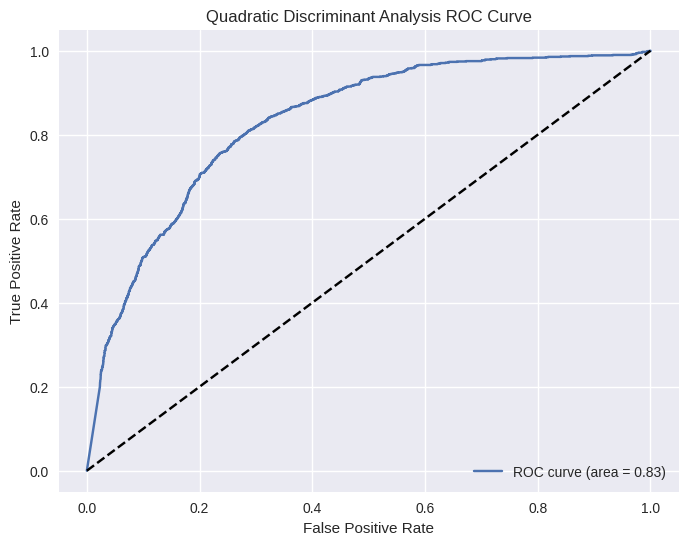

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Train QuadraticDiscriminantAnalysis classifier
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Make predictions
y_pred_qda = qda_model.predict(X_test)
y_pred_proba_qda = qda_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_qda = accuracy_score(y_test, y_pred_qda)
cm_qda = confusion_matrix(y_test, y_pred_qda)
clf_report_qda = classification_report(y_test, y_pred_qda)
roc_auc_qda = roc_auc_score(y_test, y_pred_proba_qda)
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_pred_proba_qda)

# Print evaluation metrics
print(f"Quadratic Discriminant Analysis Accuracy: {accuracy_qda:.4f}")
print("Confusion Matrix:")
print(cm_qda)
print("Classification Report:")
print(clf_report_qda)
print(f"Quadratic Discriminant Analysis ROC AUC Score: {roc_auc_qda:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_qda, tpr_qda, label=f'ROC curve (area = {roc_auc_qda:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Quadratic Discriminant Analysis ROC Curve")
plt.legend(loc="lower right")
plt.show()

Gradient Boosting Classifier Accuracy: 0.9036
Confusion Matrix:
[[7711  241]
 [ 631  460]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043

Gradient Boosting Classifier ROC AUC Score: 0.9205


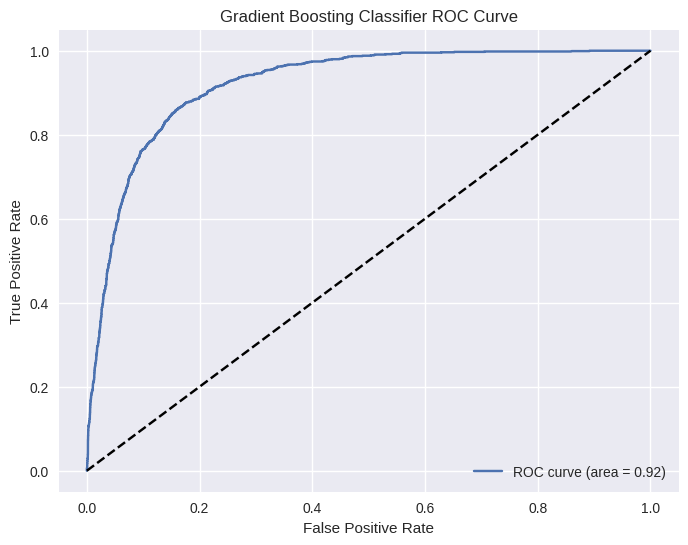

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Train GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)
clf_report_gb = classification_report(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)

# Print evaluation metrics
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")
print("Confusion Matrix:")
print(cm_gb)
print("Classification Report:")
print(clf_report_gb)
print(f"Gradient Boosting Classifier ROC AUC Score: {roc_auc_gb:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

AdaBoost Classifier Accuracy: 0.8938
Confusion Matrix:
[[7745  207]
 [ 753  338]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.62      0.31      0.41      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.64      0.68      9043
weighted avg       0.88      0.89      0.88      9043

AdaBoost Classifier ROC AUC Score: 0.8985


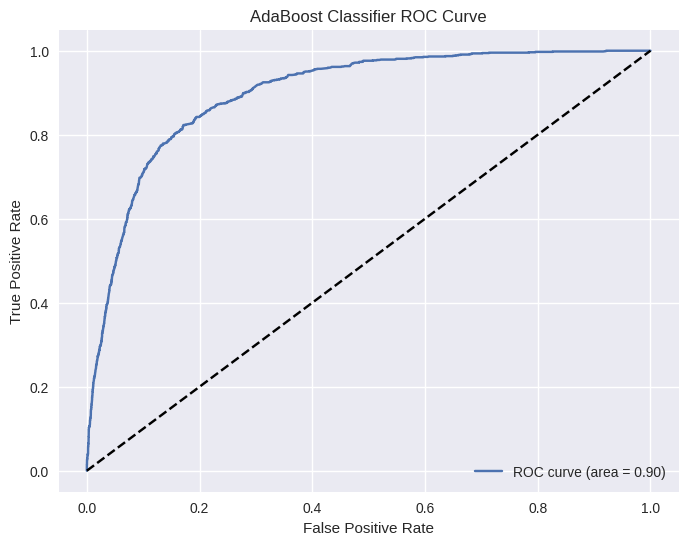

In [35]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_model.predict(X_test)
y_pred_proba_ada = ada_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
cm_ada = confusion_matrix(y_test, y_pred_ada)
clf_report_ada = classification_report(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)

# Print evaluation metrics
print(f"AdaBoost Classifier Accuracy: {accuracy_ada:.4f}")
print("Confusion Matrix:")
print(cm_ada)
print("Classification Report:")
print(clf_report_ada)
print(f"AdaBoost Classifier ROC AUC Score: {roc_auc_ada:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoost Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

[LightGBM] [Info] Number of positive: 4198, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116069 -> initscore=-2.030190
[LightGBM] [Info] Start training from score -2.030190
LightGBM Classifier Accuracy: 0.9067
Confusion Matrix:
[[7667  285]
 [ 559  532]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.65      0.49      0.56      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043

LightGBM Cl

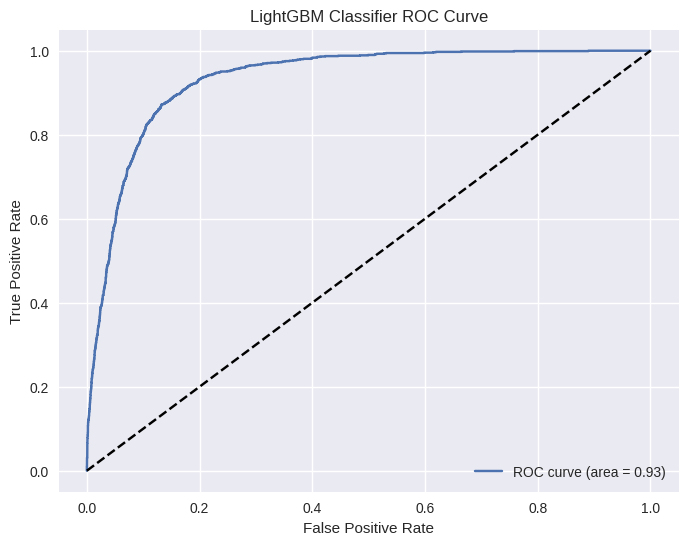

In [36]:
import lightgbm as lgb

# Train LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
clf_report_lgb = classification_report(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_proba_lgb)

# Print evaluation metrics
print(f"LightGBM Classifier Accuracy: {accuracy_lgb:.4f}")
print("Confusion Matrix:")
print(cm_lgb)
print("Classification Report:")
print(clf_report_lgb)
print(f"LightGBM Classifier ROC AUC Score: {roc_auc_lgb:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f'ROC curve (area = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LightGBM Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

Bagging Classifier Accuracy: 0.8982
Confusion Matrix:
[[7674  278]
 [ 643  448]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.41      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

Bagging Classifier ROC AUC Score: 0.8855


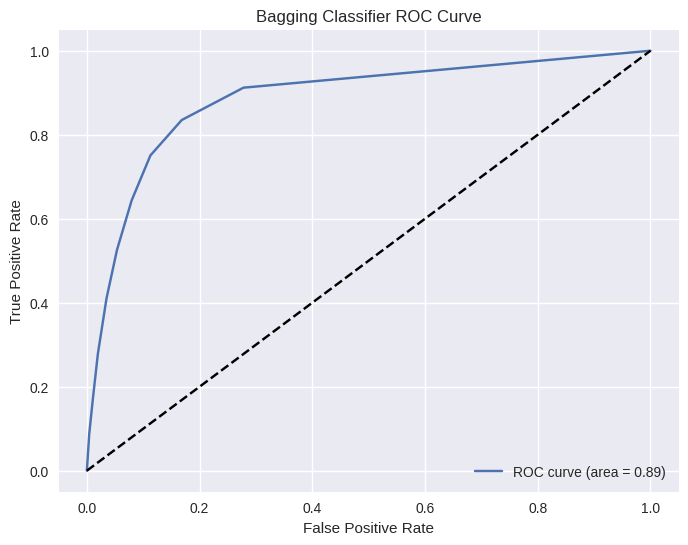

In [37]:
from sklearn.ensemble import BaggingClassifier

# Train BaggingClassifier
bag_model = BaggingClassifier(random_state=42)
bag_model.fit(X_train, y_train)

# Make predictions
y_pred_bag = bag_model.predict(X_test)
y_pred_proba_bag = bag_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_bag = accuracy_score(y_test, y_pred_bag)
cm_bag = confusion_matrix(y_test, y_pred_bag)
clf_report_bag = classification_report(y_test, y_pred_bag)
roc_auc_bag = roc_auc_score(y_test, y_pred_proba_bag)
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_pred_proba_bag)

# Print evaluation metrics
print(f"Bagging Classifier Accuracy: {accuracy_bag:.4f}")
print("Confusion Matrix:")
print(cm_bag)
print("Classification Report:")
print(clf_report_bag)
print(f"Bagging Classifier ROC AUC Score: {roc_auc_bag:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_bag, tpr_bag, label=f'ROC curve (area = {roc_auc_bag:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Bagging Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

Extra Trees Classifier Accuracy: 0.9014
Confusion Matrix:
[[7775  177]
 [ 715  376]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.68      0.34      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

Extra Trees Classifier ROC AUC Score: 0.9094


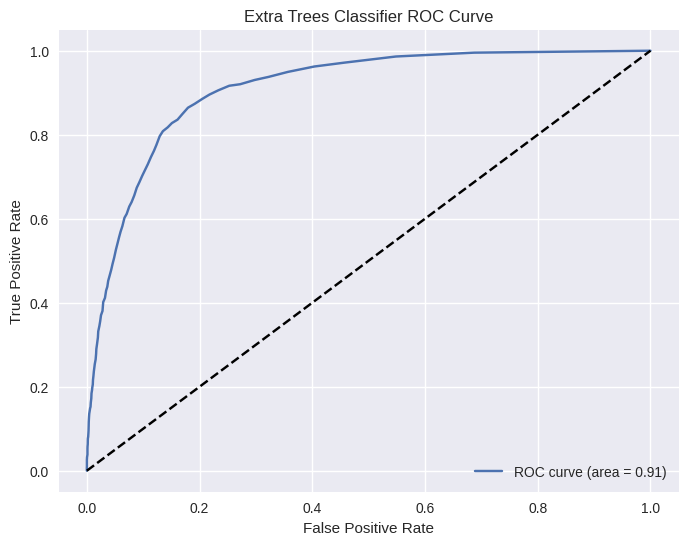

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

# Train ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Make predictions
y_pred_et = et_model.predict(X_test)
y_pred_proba_et = et_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_et = accuracy_score(y_test, y_pred_et)
cm_et = confusion_matrix(y_test, y_pred_et)
clf_report_et = classification_report(y_test, y_pred_et)
roc_auc_et = roc_auc_score(y_test, y_pred_proba_et)
fpr_et, tpr_et, _ = roc_curve(y_test, y_pred_proba_et)

# Print evaluation metrics
print(f"Extra Trees Classifier Accuracy: {accuracy_et:.4f}")
print("Confusion Matrix:")
print(cm_et)
print("Classification Report:")
print(clf_report_et)
print(f"Extra Trees Classifier ROC AUC Score: {roc_auc_et:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_et, tpr_et, label=f'ROC curve (area = {roc_auc_et:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extra Trees Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

[LightGBM] [Info] Number of positive: 4198, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116069 -> initscore=-2.030190
[LightGBM] [Info] Start training from score -2.030190
[LightGBM] [Info] Number of positive: 3358, number of negative: 25576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 28934, number of used features: 42
[LightGBM] [Info] [b

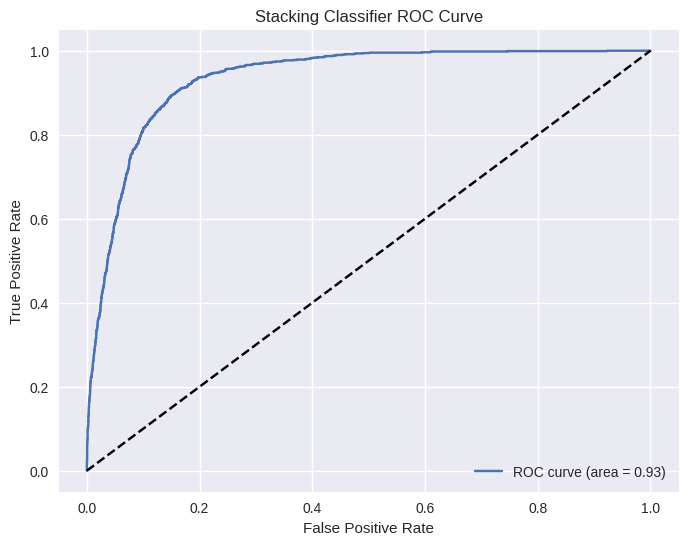

In [40]:
from sklearn.ensemble import StackingClassifier

# Define base estimators
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")),
    ('lgb', lgb.LGBMClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Create StackingClassifier with LogisticRegression as final estimator
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),
    cv=5
)

# Train StackingClassifier
stack_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stack_model.predict(X_test)
y_pred_proba_stack = stack_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_stack = accuracy_score(y_test, y_pred_stack)
cm_stack = confusion_matrix(y_test, y_pred_stack)
clf_report_stack = classification_report(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_pred_proba_stack)
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_pred_proba_stack)

# Print evaluation metrics
print(f"Stacking Classifier Accuracy: {accuracy_stack:.4f}")
print("\nConfusion Matrix:")
print(cm_stack)
print("\nClassification Report:")
print(clf_report_stack)
print(f"\nStacking Classifier ROC AUC Score: {roc_auc_stack:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stack, tpr_stack, label=f'ROC curve (area = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Stacking Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()